In [290]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

Messbereich 10cm - 80cm
70 - 10 = 60

In [291]:
cm = list(range(100,730,30))
print(cm)

[100, 130, 160, 190, 220, 250, 280, 310, 340, 370, 400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700]


In [292]:
messDaten = []
mittelwerte = []
for i in range(0,21):
    messDaten.append(np.genfromtxt(os.getcwd() + "/Messdaten/Messdistanz" + str(100 + 30*i) + "mm.csv", delimiter=";", skip_header=3, usecols=(1,)))
    mittelwerte.append(np.mean(messDaten[i]))

# print(messDaten[1][0:20])
print(mittelwerte)

[1.3763095348605578, 1.2035080388446213, 1.0886709741035858, 0.9918515088645415, 0.8980069611553788, 0.8411729437250999, 0.7631841162350598, 0.7218150724103584, 0.6805531883466136, 0.6209855015936253, 0.5824104221115538, 0.5444445959163345, 0.5444445959163345, 0.5251849458167331, 0.5059439832669324, 0.46830024203187254, 0.4491152543824701, 0.42981611683266935, 0.4301328859561754, 0.4111873566733067, 0.39261626792828686]


-1.496265718229562 5.196927456523565


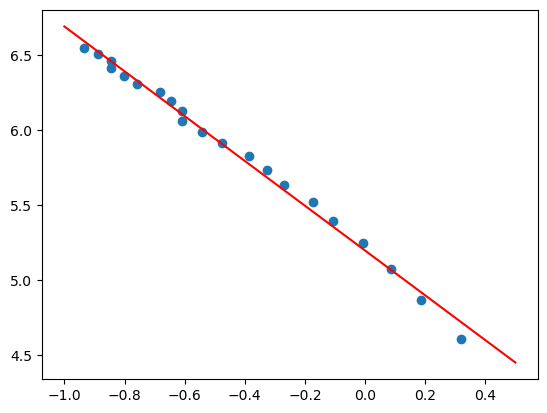

In [293]:
x = mittelwerte
y = cm

logx = np.log(x)
logy = np.log(y)
mx = np.mean(logx)
my = np.mean(logy)
a = np.divide(np.sum((logx - mx) * (logy - my)),
              np.sum(np.power((logx - mx), 2)))
b = my - a * mx


#plt.subplot(2,1,1)
plt.plot(logx , logy, 'o')

print(a, b)
#plt.subplot(2,1,2)

def f(x):
   return a*x+b

x = np.linspace(-1, 0.5, 21)

plt.plot(x, f(x), color='red')
plt.show()

Regressions gerade ohne L

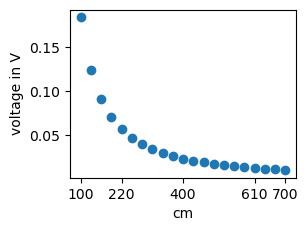

In [294]:
x = [a * x + b for x in cm]
y = [np.exp(b) * np.power(x, a) for x in cm]
plt.subplot(2,2,1)
plt.xticks((100, 220, 400, 610, 700))
plt.xlabel("cm")
plt.ylabel("voltage in V")
plt.plot(cm, y, 'o')

In [295]:

bb = np.genfromtxt(os.getcwd() + "/Messdaten/BlattBreite.csv", delimiter=";", skip_header=3, usecols=(1,))


bbcm = np.exp(b) * np.power(bb, a)
blcm = bbcm * 1.414
b_mean = bbcm.mean()
l_mean = blcm.mean()

print(b_mean, l_mean, b_mean * l_mean)

205.74207843267385 290.91929890380095 59854.3412126443


# Absoluter Fehler

In [296]:
print(210 - b_mean)

4.25792156732615


# Standardabweichung des mittelwertes

In [297]:
s = np.std(bbcm, ddof=1) / np.sqrt(bb.size)
print(s)

0.03658513842507899


In [304]:
print("68.26% Sicherheit " + str(b_mean.round(3)) +   " +- " + str(s))
print("95% Sicherheit " + str(b_mean.round(3)) +   " +- " + str(s*1.96))
print("99% Sicherheit " + str(b_mean.round(3)) +   " +- " + str(s*2.58))

68.26% Sicherheit 205.742 +- 0.03658513842507899
95% Sicherheit 205.742 +- 0.07170687131315481
99% Sicherheit 205.742 +- 0.09438965713670379
